In [33]:
import netCDF4 as nc
import numpy as np
import glob
files=sorted(glob.glob('dataX/*.nc'))
ugridL=[]
vgridL=[]
idayL=[]
phi_gridL=[]
q_gridL=[]
t_gridL=[]
ps_gridL=[]
for f in files[1:201]:
    ds=nc.Dataset(f)
    u_grid=ds['u_grid'][:]
    v_grid=ds['v_grid'][:]
    idayL.extend(ds['iday'][:].data)
    ss=u_grid.shape
    ugridL.extend(u_grid.reshape(ss[0],ss[1]*ss[2]*ss[3]))
    vgridL.extend(v_grid.reshape(ss[0],ss[1]*ss[2]*ss[3]))
    phi_grid=ds['phi_grid'][:]
    q_grid=ds['q_grid'][:]
    t_grid=ds['t_grid'][:]
    ps_grid=ds['ps_grid'][:]
    ss=phi_grid.shape
    #print(ss)
    phi_gridL.extend(phi_grid.reshape(ss[0],ss[1]*ss[2]*ss[3]))
    q_gridL.extend(q_grid.reshape(ss[0],ss[1]*ss[2]*ss[3]))
    t_gridL.extend(t_grid.reshape(ss[0],ss[1]*ss[2]*ss[3]))
    ps_gridL.extend(ps_grid.reshape(ss[0],ss[1]*ss[2]))
    ds.close()

In [34]:
print(len(ugridL))
idayL=np.array(idayL)
print(idayL[:].min(),idayL[:].max())

24348
0.05555555555555555 365.80555555555554


In [35]:
ugridL=np.array(ugridL)
vgridL=np.array(vgridL)
phi_gridL=np.array(phi_gridL)
q_gridL=np.array(q_gridL)
t_gridL=np.array(t_gridL)
ps_gridL=np.array(ps_gridL)
idayL=np.array(idayL)
idayL=idayL.astype(int)
ugridmL=[]
vgridmL=[]
phi_gridmL=[]
q_gridmL=[]
t_gridmL=[]
ps_gridmL=[]
nL=[]
for ih in range(365):
    a=np.nonzero(idayL==ih)
    nL.append(len(a[0]))
    ugridmL.append(np.mean(ugridL[a],axis=0))
    vgridmL.append(np.mean(vgridL[a],axis=0))
    phi_gridmL.append(np.mean(phi_gridL[a],axis=0))
    q_gridmL.append(np.mean(q_gridL[a],axis=0))
    t_gridmL.append(np.mean(t_gridL[a],axis=0))
    ps_gridmL.append(np.mean(ps_gridL[a],axis=0))
    

print(np.sum(nL))

24332


In [36]:
for i in range(ugridL.shape[0]):
    iday_=int(idayL[i])
    if iday_>=365:
        iday_=iday_%365
    ugridL[i,:]-=ugridmL[iday_]
    vgridL[i,:]-=vgridmL[iday_]
    phi_gridL[i,:]-=phi_gridmL[iday_]
    q_gridL[i,:]-=q_gridmL[iday_]
    t_gridL[i,:]-=t_gridmL[iday_]
    ps_gridL[i,:]-=ps_gridmL[iday_]


In [37]:
uvgridL=np.concatenate((ugridL,vgridL),axis=1)
phi_q_t_ps_gridL=np.concatenate((phi_gridL,q_gridL,t_gridL,ps_gridL),axis=1)
from sklearn.decomposition import PCA


In [28]:
pca_uv = PCA(n_components=300)
pca_uv.fit(uvgridL)

PCA(n_components=300)

In [ ]:
pca_phi_q_t_ps = PCA(n_components=300)
pca_phi_q_t_ps.fit(phi_q_t_ps_gridL)

In [ ]:
print(pca_uv.explained_variance_ratio_.sum())
print(pca_phi_q_t_ps.explained_variance_ratio_.sum())
import pickle
pickle.dump([pca_uv,pca_phi_q_t_ps,idayL],open('pca_5vars_300.pkl','wb'))


In [ ]:

uv_pca=pca_uv.transform(uvgridL)
phi_q_t_ps_pca=pca_phi_q_t_ps.transform(phi_q_t_ps_gridL)
# save the uv_pca, phi_q_t_ps_pca data
import pickle
pickle.dump([uv_pca,phi_q_t_ps_pca,idayL],open('uv_pca_300.pkl','wb'))

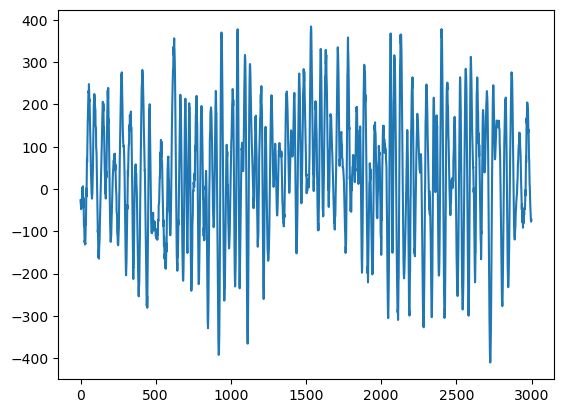

In [32]:

plt.plot(uv_pca[:3000,2])

In [30]:

for f in files[1:201]:
    ds=nc.Dataset(f)
    
    ds.close()

phi_gridL=np.array(phi_gridL)
q_gridL=np.array(q_gridL)
t_gridL=np.array(t_gridL)
ps_gridL=np.array(ps_gridL)

# import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
phi_q_t_ps_sc=scaler2.fit_transform(phi_q_t_ps_gridL)

(116, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(112, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(112, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(112, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(116, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 8)
(120, 96, 48, 8)
(124, 96, 48, 

In [32]:
print(phi_q_t_ps_sc.shape)
print(uvgrid_sc.shape)
pca2 = PCA(n_components=300)
pca2.fit(phi_q_t_ps_sc)

(14612, 115200)
(14612, 73728)


PCA(n_components=300)

In [35]:
print(pca2.explained_variance_ratio_.sum())
pickle.dump([pca2,scaler2],open('pca_phi_q_t_ps_300.pkl','wb'))

# transform the data
phi_q_t_ps_pca=pca2.transform(phi_q_t_ps_sc)
uvgrid_pca=pca.transform(uvgrid_sc)
# save the data
np.save('phi_q_t_ps_pca.npy',phi_q_t_ps_pca)
np.save('uvgrid_pca.npy',uvgrid_pca)

0.9554359991773339
